In [115]:
import random

def MontyHall(N, Switch, Doors):
    
    no_of_times_won = 0
    wonList = [0]

    for k in range(N):
        doorList = list(range(Doors))
    
        car_index = random.choice(doorList)
        first_choice = random.choice(doorList)
    
        if first_choice == car_index:
            doorList.remove(car_index)
            alternative_door = random.choice(doorList)
            doorList.remove(alternative_door)
            remaining_door = doorList
        else:
            remaining_door = car_index
        
        if Switch:
            final_choice = remaining_door
        else:
            final_choice = first_choice
        
        if final_choice == car_index:
            no_of_times_won += 1

        wonList.append(no_of_times_won/len(wonList))
            
    
    winning_probability = (no_of_times_won/N)*100
    
    return winning_probability/100, wonList

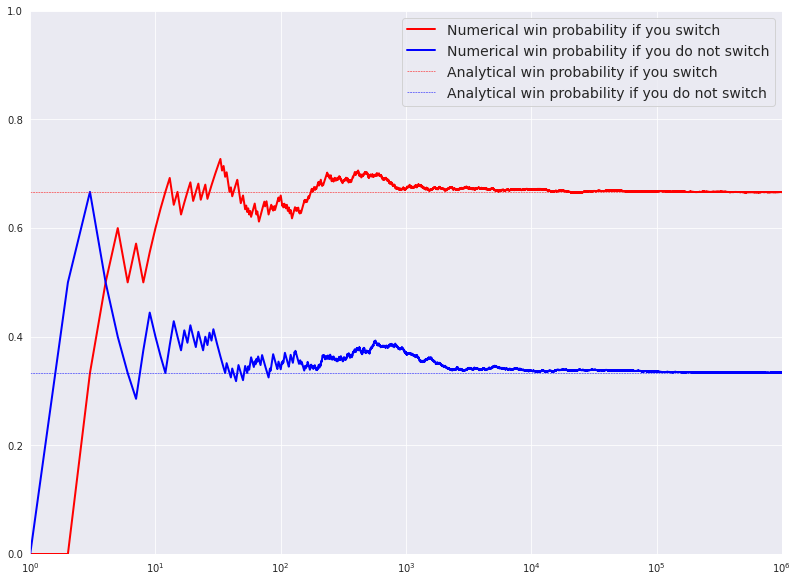

In [126]:
x1 = MontyHall(1000000, True, 3)[1]
x2 = MontyHall(1000000, False, 3)[1]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x1, color='r', linewidth=2)
ax.plot(x2, color='b', linewidth=2)
plt.axhline(y=0.6666, color='r', linestyle='--', linewidth=0.5)
plt.axhline(y=0.3333, color='b', linestyle='--', linewidth=0.5)
plt.legend(['Numerical win probability if you switch', 'Numerical win probability if you do not switch', 
            'Analytical win probability if you switch','Analytical win probability if you do not switch'], 
           fontsize=14)
ax.set_xscale('log')
plt.ylim([0, 1])
plt.xlim([1, 1000000])
fig.set_size_inches(12, 9)
plt.tight_layout(pad=4.0)
plt.savefig("run_plot.png", dpi=400)

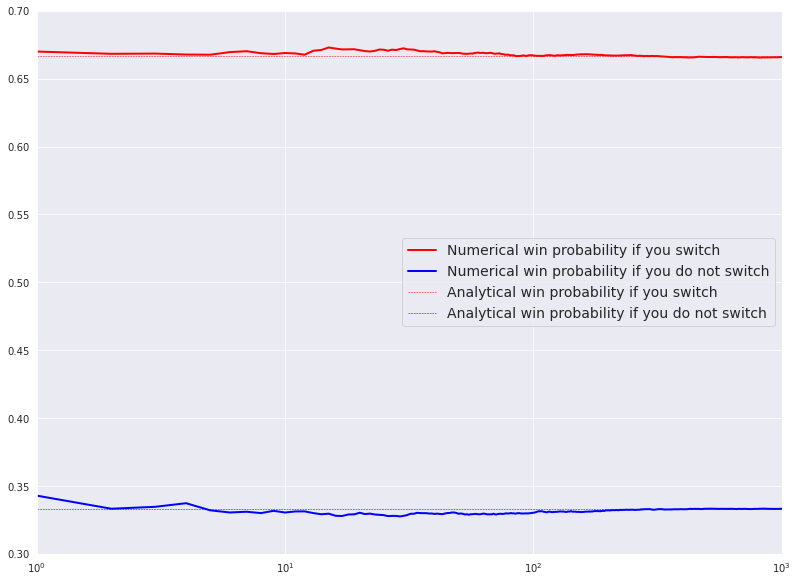

In [127]:
import matplotlib.pyplot as plt
import numpy as np

N = 1000
NList = list(range(N))
SwapProbList = []
NoSwapProbList = []
AvSPL = []
AvNSPL = []

for i in NList:
    SwapProbList.append(MontyHall(N, True, 3)[0])
    NoSwapProbList.append(MontyHall(N, False, 3)[0])
    AvSPL.append(sum(SwapProbList)/len(SwapProbList))
    AvNSPL.append(sum(NoSwapProbList)/len(NoSwapProbList))


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(AvSPL, color='r', linewidth=2)
ax.plot(AvNSPL, color='b', linewidth=2)
plt.axhline(y=0.6666, color='r', linestyle='--', linewidth=0.5)
plt.axhline(y=0.3333, color='b', linestyle='--', linewidth=0.5)
plt.legend(['Numerical win probability if you switch', 'Numerical win probability if you do not switch', 
            'Analytical win probability if you switch','Analytical win probability if you do not switch'], 
           fontsize=14)
ax.set_xscale('log')
plt.ylim([0.3, 0.7])
plt.xlim([1, N])
fig.set_size_inches(12, 9)
plt.tight_layout(pad=4.0)
plt.savefig("convergence_plot.png", dpi=400)